# Descision tree

In [1]:
import sklearn 
from sklearn.datasets import load_iris
iris=load_iris()
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt 

# to get the documentation: use help(tree.DecisionTreeClassifier)


In [26]:
# A very simple example, with two examples X, each in one class y:
clf = tree.DecisionTreeClassifier()
X = [[0, 0], [1, 1]]
y = [0, 1]
#Tree construction
clf = clf.fit(X, y)
# Class prediction for a new example
clf.predict([[2., 2.]])

array([1])

[Text(0.5, 0.75, 'x[1] <= 0.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

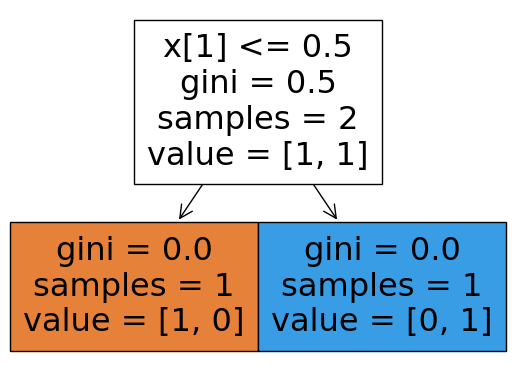

In [27]:
# display of the tree
tree.plot_tree(clf, filled=True)

#### Question 1: What is the node test used to build the tree? Explain the prediction for the new sample.
Le test node est la comparaison x[1]<= 0.5. Si il est inférieur à 0.5 il va dans le première classe sinon dans la deuxième classe

Si nous devons prédire la classe d'un nouvel échantillon x, nous allons regarder la valeur de x[1], si sa valeur est inférieur à 0.5 il va être classé dans la première classe sinon dans la seconde classe.

exemple : x=[2,2] va être classé dans la seconde classe

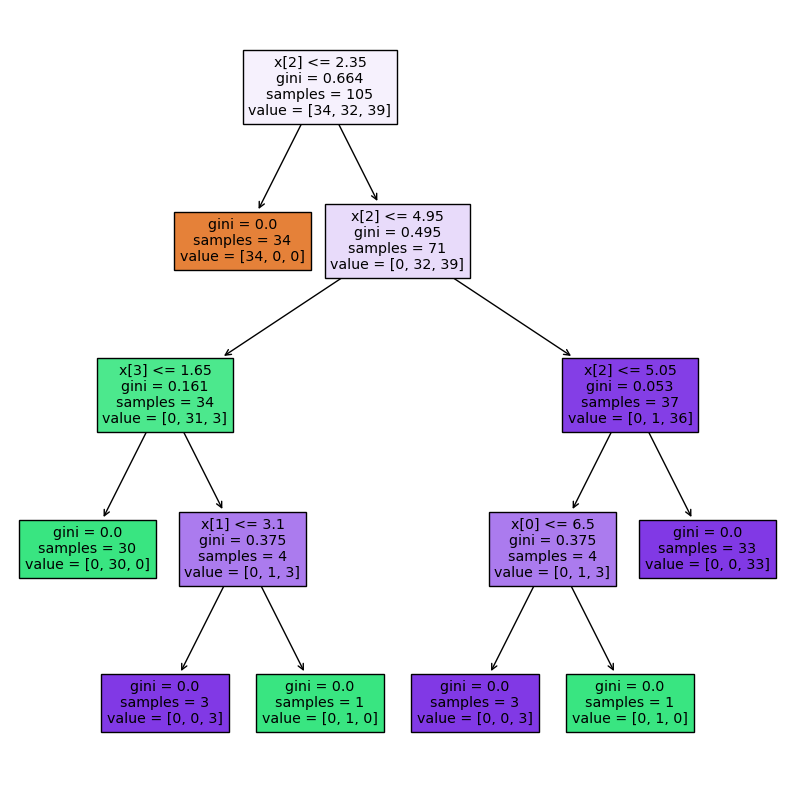

In [28]:
# A more complex example: Iris data (150 samples of 3 types of iris, characterized by 4 attributes) 
# See https://archive.ics.uci.edu/ml/datasets/Iris

X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [29]:
# prediction on the test set and computation of the accuracy
clf.predict(X_test)
clf.score(X_test, y_test)

0.9777777777777777

### Question 2: change the initial splitting of the dataset by reducing the size of the training set. What do you observe on the tree? on the accuracy?
Lorsque le l'on réduit la taille du set d'entrainement, la taille de l'arbre est réduite (le nombre de tests) et la précision est également réduuite. Cela s'explique par la taille du set qui est réduit et donc une variabilité affaiblit.
exemple : ci-dessous avec un train_size = 0.3

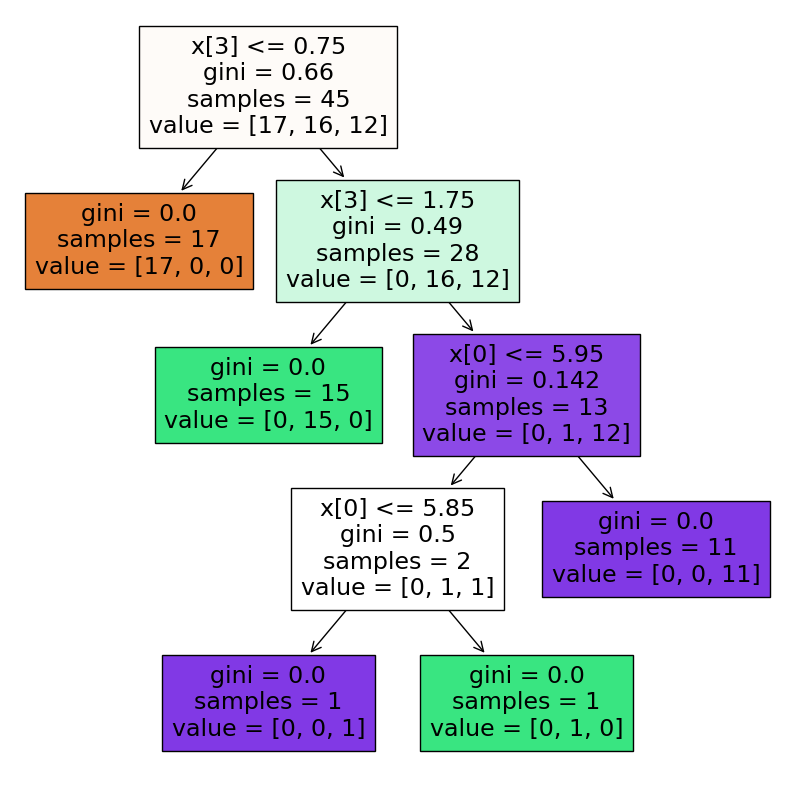

In [34]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.3, random_state=0)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10)) 
tree.plot_tree(clf,filled=True) 
plt.show()

In [35]:
# prediction on the test set and computation of the accuracy
clf.predict(X_test)
clf.score(X_test, y_test)

0.9428571428571428

### Question 3: clf = tree.DecisionTreeClassifier() uses default parameters (Gini criterion, no limit on max_depth...). 
### Change the max_depth parameter, the min_samples_leaf parameter, and others if enough time.
### Conclusion?

- Si max_depht est trop faible : on n'obtient pas une classification complète (toutes les branches avec un GINI=0)
- Si min_samples_leaf est trop élevé alors 

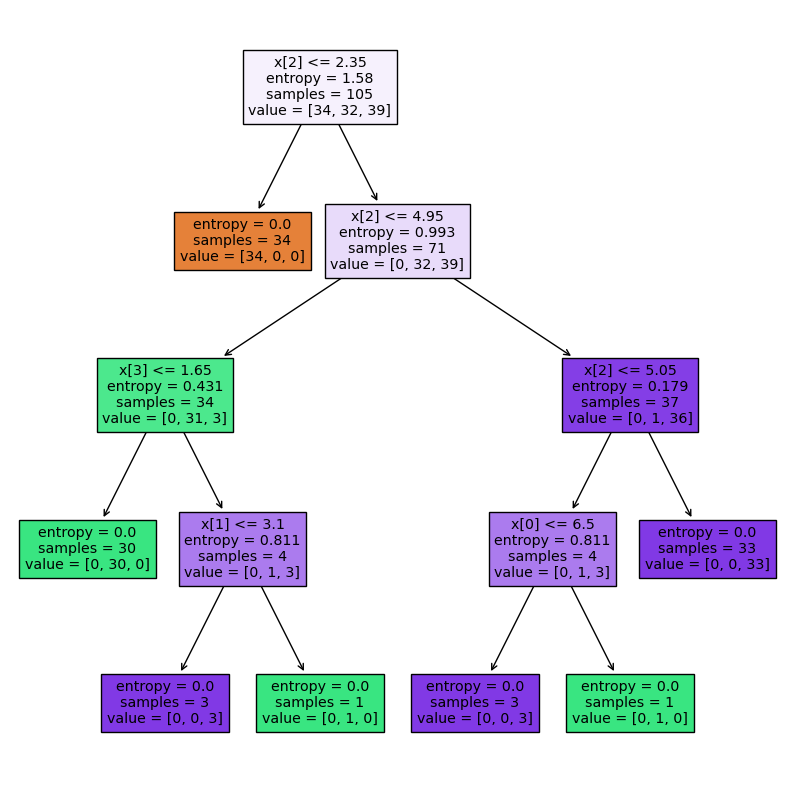

In [86]:
X, y = iris.data, iris.target
# Splitting the data into training set (70%) and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth = 100, min_samples_leaf=1)
clf.fit(X_train, y_train)

#display
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)
plt.show()

In [78]:
# prediction on the test set and computation of the accuracy
clf.predict(X_test)
clf.score(X_test, y_test)

0.9777777777777777

In [79]:
# Another evaluation can be provided by the confusion matrix:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, clf.predict(X_test))
print(cm)

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


### Question 4: by testing different trees (built with different parameter values), does a class appear as easier to classify than the others?

- la classe 0 est la meilleur car n'est pas dépendant des hyperparamètres
